In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward2

maxcor
F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data()
d = data[8011]
print(d.family)

Style_A


In [3]:
# importlib.reload(seis_prior)
# importlib.reload(seis_diagnostics)
# importlib.reload(seis_invert)
# kgs.profiling=False
# kgs.debugging_mode = 0
# seis_forward2.profiling=False
# seis_forward2.reset_profile()

# model = seis_invert.InversionModel()
# model.state = 1
# model.method = 'L-BFGS-B'
# model.maxiter = 5000
# model.prior = seis_prior.SquaredExponential()


# model.prior.basis_functions();
# w = cp.linalg.eigvalsh(model.prior.P)   
# plt.figure()
# plt.semilogy(cp.asnumpy(cp.abs(w)))

maxcor


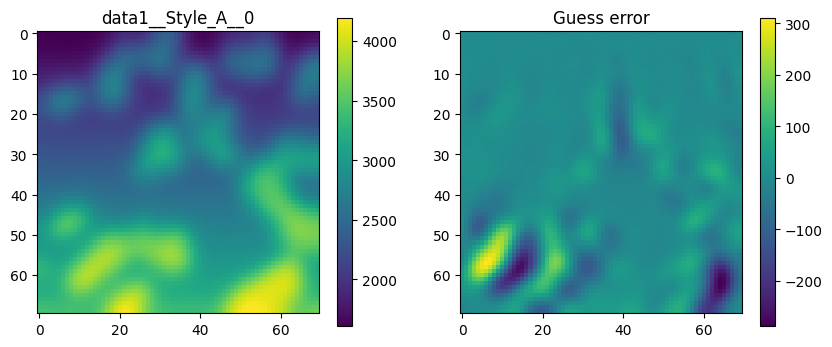

False False
(4901, 4901)
True False
(4901, 4901)
(4900, 4900)


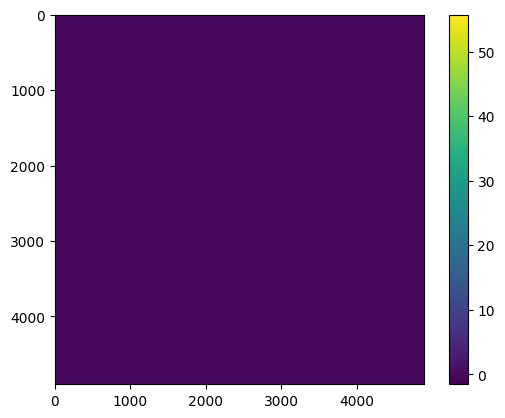

7.696693719028448e-05 54.6734814194331
1.6266505091937922 183.28989931863285
7.271770450577102e-05 54.66616557883483
7.23828861951562e-05 54.663760471787384
7.232915364961861e-05 54.66348065674297
7.203955897112119e-05 54.66098381783577
7.142650193054817e-05 54.659373814392346
6.835454367211075e-05 54.649886743808054
6.750781905490254e-05 54.64947688120222
6.676390194073926e-05 54.65033427164445
6.664321662836797e-05 54.65042823385503
6.632806347586563e-05 54.64993801646466
6.593700791415361e-05 54.64878986511796
6.557735770187426e-05 54.64760255101632
6.514962363577613e-05 54.646299597569914
6.470776664855664e-05 54.645416685905346
6.391963569280364e-05 54.643707090337955
6.329001942881706e-05 54.64225789645395
6.188354982166106e-05 54.638617416232854
6.049307391150084e-05 54.63440184032984
5.942689243618483e-05 54.62928704920481
5.9072603975275385e-05 54.62637213103843
5.89759617295605e-05 54.62552138769149
5.874700533547832e-05 54.62326076988508
5.827869989370991e-05 54.617899691847

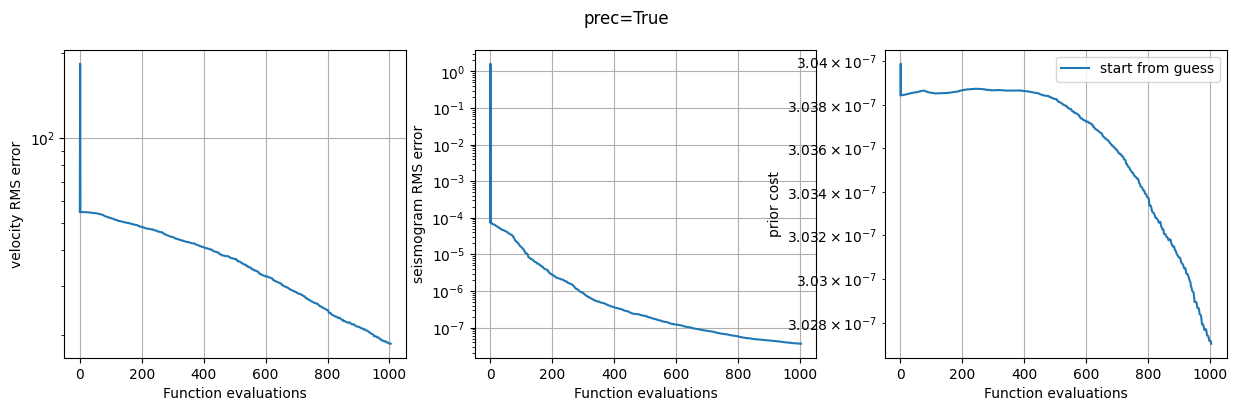

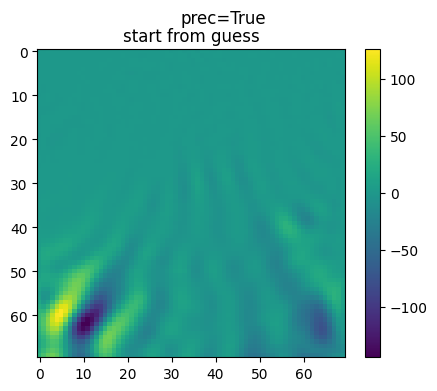

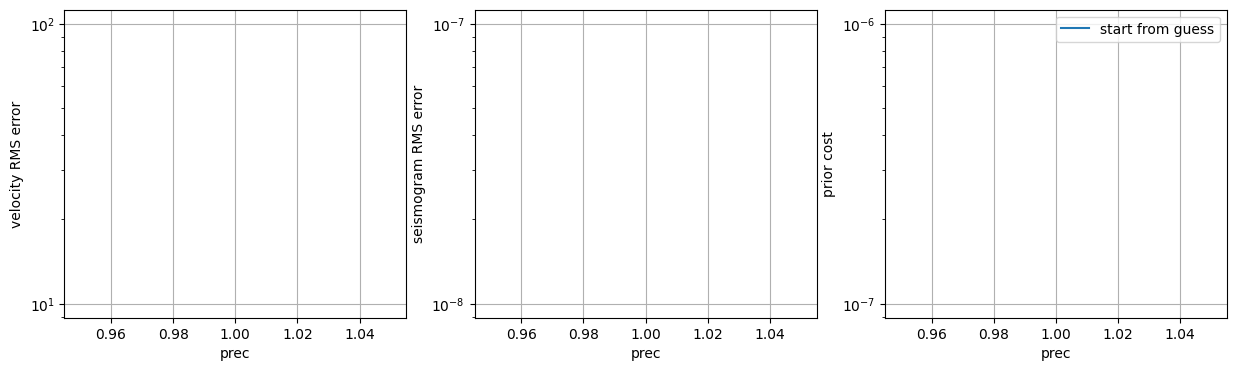

In [19]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
kgs.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_invert.InversionModel()
model.state = 1
model.maxiter = 1000
model.history_size = 10000
model.prior = seis_prior.SquaredExponential()
model.prior.transform = False
model.prior.svd_cutoff = 1.
model.prior.λ = 10**-11
#model.prior.basis_functions()
#KK = cp.pad(model.prior.K, ((0, 1), (0, 1)), mode='constant', constant_values=0)
#KK[-1,-1] = 10000.
#U,s,_=cp.linalg.svd(model.prior.K,compute_uv=True)
#model.prec_matrix = (U@cp.diag(cp.sqrt(s)))
#model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
#model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
#plt.figure()
#plt.imshow(cp.asnumpy(cp.log(cp.reshape(cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],(70,70)))/cp.log(10)))
#plt.colorbar()
#model.prior.use_full=True

do_which_list = [False,False,True]

def param_func(model,value):
    if value:
        #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
        model.prior.basis_functions()
        #KK = cp.pad(model.prior.K, ((0, 1), (0, 1)), mode='constant', constant_values=0)
        #KK[-1,-1] = 10000.
        U,s,_=cp.linalg.svd(model.prior.P+(1/model.prior.λ)*cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],compute_uv=True)
        model.prec_matrix = (U@cp.diag(1/cp.sqrt(s)))
        model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
        model.prec_matrix[-1,-1] = 1.
        #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
        # U,s,_=cp.linalg.svd(model.prior.K,compute_uv=True)
        # model.prec_matrix = (U@cp.diag(cp.sqrt(s)))
        # model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
        # model.prec_matrix[-1,-1] = 1.
    #model.prior.transform = value
    return model
param_values = [True]
param_name = "prec"


for d in data[8000:8001]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.0)

In [ ]:
%debug

In [ ]:
seis_forward2.show_profile(1)